# Market clustering 

## Cleaning markets data

In [1]:


import pandas as pd

food_price_df = pd.read_csv("cmr_food_price_monthly.csv")
food_price_df.head()

,ISO3,country,adm1_name,adm2_name,mkt_name,lat,lon,geo_id,DATES,year,...,c_imp_rice,o_imp_wheat_flour,h_imp_wheat_flour,l_imp_wheat_flour,c_imp_wheat_flour,o_food_price_index,h_food_price_index,l_food_price_index,c_food_price_index,basket_price
0,CMR,Cameroon,Nord,Bénoué,Adoumri,9.25,13.8,gid_092500138000,1/1/2007,2007,...,320.03,351.96,356.81,347.59,352.20,0.82,0.84,0.82,0.83,1408.3202
1,CMR,Cameroon,Nord,Bénoué,Adoumri,9.25,13.8,gid_092500138000,2/1/2007,2007,...,325.04,352.44,357.05,347.82,355.85,0.83,0.84,0.82,0.82,1417.3970
2,CMR,Cameroon,Nord,Bénoué,Adoumri,9.25,13.8,gid_092500138000,3/1/2007,2007,...,321.07,356.21,360.96,351.47,355.84,0.82,0.83,0.82,0.83,1416.7332
3,CMR,Cameroon,Nord,Bénoué,Adoumri,9.25,13.8,gid_092500138000,4/1/2007,2007,...,323.03,355.99,361.13,350.86,354.75,0.83,0.84,0.83,0.85,1425.9960
4,CMR,Cameroon,Nord,Bénoué,Adoumri,9.25,13.8,gid_092500138000,5/1/2007,2007,...,331.74,354.99,360.31,349.67,359.07,0.85,0.86,0.85,0.86,1443.9976


In [2]:
# Aggregates monthly prices to annual

invariant_features = ['mkt_name', 'adm1_name','lat', 'lon', 'year']

agregated_prices_by_market = food_price_df.groupby(invariant_features, as_index=False)['basket_price'].mean()
agregated_prices_by_market


,mkt_name,adm1_name,lat,lon,year,basket_price
0,Adoumri,Nord,9.25,13.8,2007,1451.582492
1,Adoumri,Nord,9.25,13.8,2008,1464.703692
2,Adoumri,Nord,9.25,13.8,2009,1433.565533
3,Adoumri,Nord,9.25,13.8,2010,1516.516675
4,Adoumri,Nord,9.25,13.8,2011,1517.591142
...,...,...,...,...,...,...
1019,Zamay,Extrême-Nord,10.63,13.9,2018,1805.593325
1020,Zamay,Extrême-Nord,10.63,13.9,2019,1851.026042
1021,Zamay,Extrême-Nord,10.63,13.9,2020,1915.807617
1022,Zamay,Extrême-Nord,10.63,13.9,2021,2017.904450


In [7]:
df_1  = agregated_prices_by_market[['year', 'basket_price']]

## Construction du dataset des prix annuels : Stackoverflow

prices_by_year_df = (
        df_1.assign(idx= df_1.groupby("year").cumcount().add(1))
            .pivot(index="idx", columns="year", values="basket_price")
            .rename_axis(None, axis=1).reset_index(drop=True)
)
prices_by_year_df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1451.582492,1464.703692,1433.565533,1516.516675,1517.591142,1527.471850,1582.413633,1629.605817,1670.165967,1710.712725,1746.697692,1794.074433,1838.593675,1898.664600,2002.264775,2079.461964
1,1530.963158,1547.390942,1519.443650,1601.165825,1604.909967,1621.466283,1671.963450,1719.700342,1760.269808,1806.519300,1845.083608,1900.419350,1941.022817,1979.909425,2092.720258,2173.878445
2,1539.439367,1558.382550,1542.993483,1611.336992,1621.556367,1647.726958,1690.027042,1734.613375,1769.371533,1817.575550,1858.593800,1906.653383,1947.398425,1989.714658,2089.540350,2173.631609
3,1539.440767,1558.383250,1542.976717,1611.336942,1621.544825,1647.704633,1690.016842,1734.608358,1769.370808,1817.586858,1858.595833,1906.651692,1947.409883,1989.732908,2089.568500,2173.661473
4,1577.337417,1600.112717,1590.061275,1657.343900,1669.237767,1690.715683,1740.066275,1785.788933,1805.889617,1892.086050,1908.333567,1925.597208,2004.545725,2079.569725,2159.062675,2270.948600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1488.186292,1505.717525,1482.730108,1561.758917,1567.815367,1583.365792,1635.315008,1687.582133,1696.031858,1720.363833,1776.883483,1829.453458,1887.537142,1995.321833,2083.382725,2186.172736
60,1520.318225,1541.218458,1523.243917,1598.250708,1607.337450,1627.423025,1678.875267,1726.814017,1725.659483,1706.388233,1792.677133,1858.307633,1922.667800,2082.768017,2167.113817,2311.102055
61,1503.502967,1524.955167,1503.284175,1591.844158,1599.858025,1614.975350,1668.167275,1750.076708,1690.788867,1687.425983,1772.715400,1828.233167,1923.832533,2103.930367,2154.447575,2269.709073
62,1493.107475,1515.924617,1513.010892,1573.258075,1589.664517,1615.038892,1659.751308,1704.016458,1674.869533,1706.935067,1775.909467,1822.990725,1889.573833,2064.842458,2129.243042,2266.366727


In [8]:
#DataFrame for the markets list

df_2 = agregated_prices_by_market.groupby(['mkt_name', 'adm1_name'], as_index=False).mean()
markets_list_df = df_2.drop(['year', 'basket_price'], axis=1)

In [9]:
#Construction du dataset des prix annuels par marchés :

yearly_prices_by_market = pd.concat([markets_list_df, prices_by_year_df], axis=1)
yearly_prices_by_market

,mkt_name,adm1_name,lat,lon,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Adoumri,Nord,9.250000,13.800000,1451.582492,1464.703692,1433.565533,1516.516675,1517.591142,1527.471850,1582.413633,1629.605817,1670.165967,1710.712725,1746.697692,1794.074433,1838.593675,1898.664600,2002.264775,2079.461964
1,Bafoussam,Ouest,5.476000,10.422000,1530.963158,1547.390942,1519.443650,1601.165825,1604.909967,1621.466283,1671.963450,1719.700342,1760.269808,1806.519300,1845.083608,1900.419350,1941.022817,1979.909425,2092.720258,2173.878445
2,Bamenda,Nord-Ouest,5.957397,10.147870,1539.439367,1558.382550,1542.993483,1611.336992,1621.556367,1647.726958,1690.027042,1734.613375,1769.371533,1817.575550,1858.593800,1906.653383,1947.398425,1989.714658,2089.540350,2173.631609
3,Bamenda-Nkwen,Nord-Ouest,5.962000,10.169000,1539.440767,1558.383250,1542.976717,1611.336942,1621.544825,1647.704633,1690.016842,1734.608358,1769.370808,1817.586858,1858.595833,1906.651692,1947.409883,1989.732908,2089.568500,2173.661473
4,Barombi Kang,Sud-Ouest,4.593105,9.467402,1577.337417,1600.112717,1590.061275,1657.343900,1669.237767,1690.715683,1740.066275,1785.788933,1805.889617,1892.086050,1908.333567,1925.597208,2004.545725,2079.569725,2159.062675,2270.948600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Yamba,Adamaoua,6.890600,14.097089,1488.186292,1505.717525,1482.730108,1561.758917,1567.815367,1583.365792,1635.315008,1687.582133,1696.031858,1720.363833,1776.883483,1829.453458,1887.537142,1995.321833,2083.382725,2186.172736
60,Yaoundé-Marché 8e,Centre,3.888887,11.497008,1520.318225,1541.218458,1523.243917,1598.250708,1607.337450,1627.423025,1678.875267,1726.814017,1725.659483,1706.388233,1792.677133,1858.307633,1922.667800,2082.768017,2167.113817,2311.102055
61,Yaoundé-Mfoundi,Centre,3.861000,11.522000,1503.502967,1524.955167,1503.284175,1591.844158,1599.858025,1614.975350,1668.167275,1750.076708,1690.788867,1687.425983,1772.715400,1828.233167,1923.832533,2103.930367,2154.447575,2269.709073
62,Yaoundé-Mokolo,Centre,3.873799,11.500051,1493.107475,1515.924617,1513.010892,1573.258075,1589.664517,1615.038892,1659.751308,1704.016458,1674.869533,1706.935067,1775.909467,1822.990725,1889.573833,2064.842458,2129.243042,2266.366727


## Clustering model 

C:\Users\YnFb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


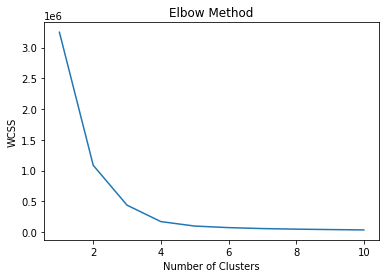

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = yearly_prices_by_market.drop(['mkt_name', 'adm1_name','lat', 'lon'], axis=1)

# Liste pour le wcss
wcss = []

# wcss pour différentes valeurs de k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

data = yearly_prices_by_market.drop(['mkt_name', 'adm1_name','lat', 'lon'], axis=1)
data_train, data_test = train_test_split(data, test_size=0.2)

### Model fitting

In [21]:
from sklearn.metrics import silhouette_score

# Optimal value of k
k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(data_train)

# Predicting the clusters for the test set
y_pred = kmeans.predict(data_test)

# Evaluating the model using silhouette
silhouette = silhouette_score(data_test, y_pred)
print("Silhouette Score: ", silhouette)


Silhouette Score:  0.7004026896214227


In [13]:
kmeans_prod = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_prod = kmeans.fit(data)

### Classes Visualization using PCA


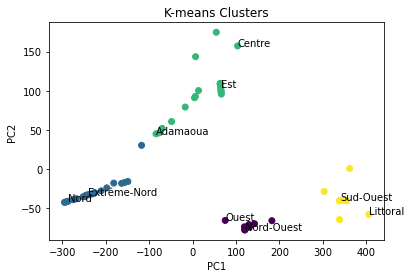

In [20]:
from sklearn.decomposition import PCA

# Initialize an instance of the PCA class from scikit-learn
pca = PCA(n_components=2)

# Fit the PCA model to the dataset
pca.fit(data)

# Transform the dataset by applying the PCA model
transformed_data = pca.transform(data)

# Create a scatter plot of the transformed data using the first two principal components
fig, ax = plt.subplots()
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], c=kmeans_prod.labels_, cmap='viridis')
plt.title('K-means Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

already_text = []
for i, txt in enumerate(yearly_prices_by_market["adm1_name"].tolist()):
    if txt not in already_text :
        ax.annotate(txt, (transformed_data[i, 0], transformed_data[i, 1]))
        already_text.append(txt)

plt.show()